In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Logistic Regression Churn Feature Analysis

**Author:** Chathuranga  
**Platform:** Kaggle  
**Goal:** Understand Logistic Regression from theory to practice, 
including cost function, gradient descent, 2D/3D loss visualization, 
and feature impact analysis for customer churn prediction.


## 1. Introduction

Customer churn refers to customers leaving a service provider.
Predicting churn is critical for telecom companies because retaining
existing customers is cheaper than acquiring new ones.

This project explores Logistic Regression in depth:
- Mathematical intuition
- Cost function (Log Loss)
- Gradient Descent optimization
- 2D and 3D loss visualization
- Feature impact analysis on model performance


## 2. Dataset Description

The dataset contains customer demographic and service usage information.
The target variable is `churn`:

- churn = 1 → customer leaves
- churn = 0 → customer stays


### Selected Features
- tenure
- age
- address
- income
- education (ed)
- employment years (employ)
- equipment ownership (equip)


## 3. Importing Required Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

print('loaded')


loaded


## 4. Data Loading and Preprocessing


In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
df = pd.read_csv(url)

df = df[['tenure','age','address','income','ed','employ','equip','churn']]
df['churn'] = df['churn'].astype(int)

df.head()


,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0


In [4]:
df.dtypes

tenure     float64
age        float64
address    float64
income     float64
ed         float64
employ     float64
equip      float64
churn        int64
dtype: object

## Feature Description

- **tenure**: Number of years the customer has been with the company.  
- **age**: Age of the customer in years.  
- **address**: Years at the current residential address.  
- **income**: Approximate annual income of the customer.  
- **ed**: Education level (ordinal scale).  
- **employ**: Number of years the customer has been employed.  
- **equip**: Equipment ownership indicator (1 = Yes, 0 = No).  
- **churn**: Customer churn status (1 = Churned, 0 = Retained).


In [5]:
df.shape

(200, 8)

In [6]:
df.describe()

,tenure,age,address,income,ed,employ,equip,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000


## 5. Feature Matrix and Target Vector


* X → independent variables

* y → dependent variable


In [7]:
X = np.asarray(df[['tenure','age','address','income','ed','employ','equip']])
y = np.asarray(df['churn'])


## 6. Feature Scaling


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 7. Train-Test Split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## 8. Logistic Regression Theory

### Sigmoid Function
\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

where:
\[
z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
\]


## 9. Cost Function (Log Loss)

Log Loss measures how well predicted probabilities match actual labels.

\[
J(w) = -\frac{1}{m} \sum_{i=1}^{m}
[y_i \log(p_i) + (1 - y_i)\log(1 - p_i)]
\]


## 10. Gradient Descent Optimization

Gradient Descent updates weights iteratively:

\[
w := w - \alpha \frac{\partial J(w)}{\partial w}
\]

where:
- α is the learning rate
- J(w) is the cost function



## 11. Logistic Regression from Scratch


### 11.1 Sigmoid Function

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


### 11.2 Cost Function (Log Loss)

In [11]:
def compute_cost(y, y_hat):
    epsilon = 1e-9  # to avoid log(0)
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    m = len(y)
    cost = -(1/m) * np.sum(
        y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    )
    return cost


### 11.3 Gradient Computation

In [12]:
def compute_gradient(X, y, y_hat):
    m = len(y)
    gradient = (1/m) * np.dot(X.T, (y_hat - y))
    return gradient


### 11.4 Gradient Descent Training Loop

In [13]:
def gradient_descent(X, y, learning_rate=0.1, iterations=1000):
    
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []

    for i in range(iterations):
        
        # Linear combination
        z = np.dot(X, weights)
        
        # Prediction
        y_hat = sigmoid(z)
        
        # Cost
        cost = compute_cost(y, y_hat)
        cost_history.append(cost)
        
        # Gradient
        gradient = compute_gradient(X, y, y_hat)
        
        # Update weights
        weights = weights - learning_rate * gradient
        
    return weights, cost_history


### 11.6 Train the Model (From Scratch)

#### Select 2 features

In [14]:
X_simple = X_train[:, :2]  # first two features only
y_simple = y_train


#### Add bias term (intercept)

In [15]:
X_simple = np.c_[np.ones(X_simple.shape[0]), X_simple]


#### Run Gradient Descent

In [16]:
weights, cost_history = gradient_descent(
    X_simple,
    y_simple,
    learning_rate=0.1,
    iterations=1000
)


## 12. Cost vs Iterations (2D Visualization)


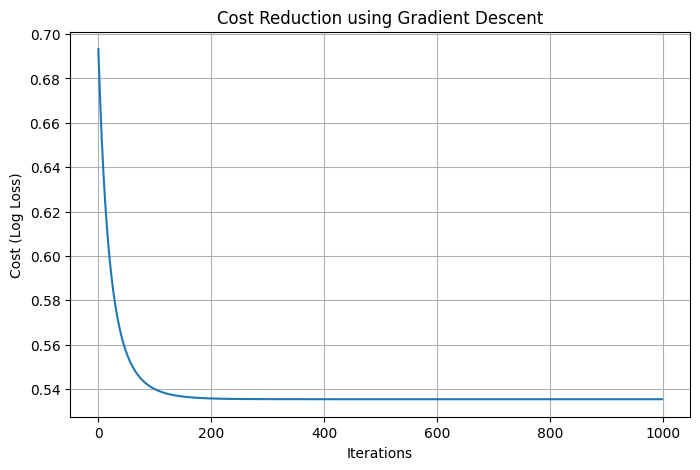

In [17]:
plt.figure(figsize=(8,5))
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (Log Loss)")
plt.title("Cost Reduction using Gradient Descent")
plt.grid(True)
plt.show()


## 13. 3D Cost Function Visualization

3D plot:

w₁, w₂ → axes

Cost → surface


#### 13.1 Why 3D Visualization?

To understand how Gradient Descent works, we visualize the cost function
as a surface. Each point on the surface represents a combination of model
parameters and the corresponding log loss value.

This visualization helps explain:
- Why gradients exist
- How the algorithm finds the minimum
- Why feature scaling is important


#### 13.2 Prepare Data (STRICT)

In [18]:
# Use the same 2-feature dataset
X_2d = X_train[:, :2]
y_2d = y_train

# Add bias term
X_2d = np.c_[np.ones(X_2d.shape[0]), X_2d]


#### 13.3 Define Cost Function for Given Weights

In [19]:
def cost_for_weights(X, y, weights):
    z = np.dot(X, weights)
    y_hat = sigmoid(z)
    return compute_cost(y, y_hat)


#### 13.4 Create Weight Ranges (Meshgrid)

In [20]:
w1_range = np.linspace(-5, 5, 50)
w2_range = np.linspace(-5, 5, 50)

W1, W2 = np.meshgrid(w1_range, w2_range)


#### 13.5 Compute Cost Surface

In [21]:
cost_surface = np.zeros(W1.shape)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        weights = np.array([0, W1[i, j], W2[i, j]])
        cost_surface[i, j] = cost_for_weights(X_2d, y_2d, weights)


#### 13.6 3D Surface Plot

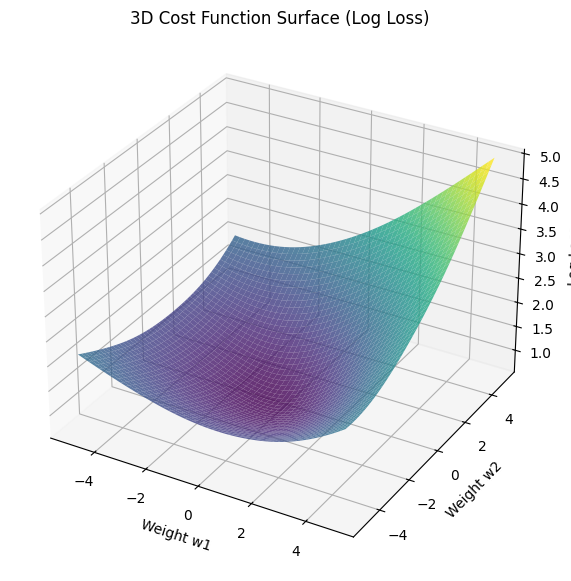

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(W1, W2, cost_surface, cmap='viridis', alpha=0.8)

ax.set_xlabel("Weight w1")
ax.set_ylabel("Weight w2")
ax.set_zlabel("Log Loss")

ax.set_title("3D Cost Function Surface (Log Loss)")
plt.show()


## Interpretation of the 3D Cost Function Surface

- The 3D surface represents the **log loss values** for different combinations
  of logistic regression model weights.

- Each point on the surface corresponds to a specific set of parameters and the
  resulting prediction error measured using log loss.

- **Higher regions** of the surface indicate poor weight configurations that
  produce incorrect or overconfident predictions.

- The **lowest point on the surface** represents the global minimum of the cost
  function and corresponds to the optimal model parameters.

- Logistic regression has a **convex cost function**, ensuring a single global
  minimum and stable convergence.

- Gradient Descent does not observe the entire surface at once; it uses the local
  gradient at the current point to determine the next update direction.

- By repeatedly moving downhill along the surface, Gradient Descent converges to
  the minimum log loss.

- High log loss values on the surface do **not** indicate poor model performance;
  they represent suboptimal weight combinations.

- The trained model’s quality should be evaluated **only at the minimum of the
  cost surface**, not across all surface values.

- This visualization highlights:
  - Why the **learning rate** influences convergence
  - Why **feature scaling** improves optimization stability
  - Why logistic regression reliably converges to a single global optimum



### Implement SGD from Scratch

In [23]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=50):
    
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []

    for epoch in range(epochs):
        
        for i in range(m):
            xi = X[i].reshape(1, -1)
            yi = y[i]
            
            z = np.dot(xi, weights)
            y_hat = sigmoid(z)
            
            error = y_hat - yi
            gradient = np.dot(xi.T, error)
            
            weights = weights - learning_rate * gradient
        
        # Cost after each epoch
        y_pred = sigmoid(np.dot(X, weights))
        cost = compute_cost(y, y_pred)
        cost_history.append(cost)

    return weights, cost_history


### Train Both Models on Same Data

In [24]:
X_compare = X_train[:, :2]
y_compare = y_train

X_compare = np.c_[np.ones(X_compare.shape[0]), X_compare]


#### Batch Gradient Descent

In [25]:
bgd_weights, bgd_cost = gradient_descent(
    X_compare,
    y_compare,
    learning_rate=0.1,
    iterations=200
)


### Stochastic Gradient Descent

In [26]:
sgd_weights, sgd_cost = stochastic_gradient_descent(
    X_compare,
    y_compare,
    learning_rate=0.01,
    epochs=50
)


### Cost Comparison Plot

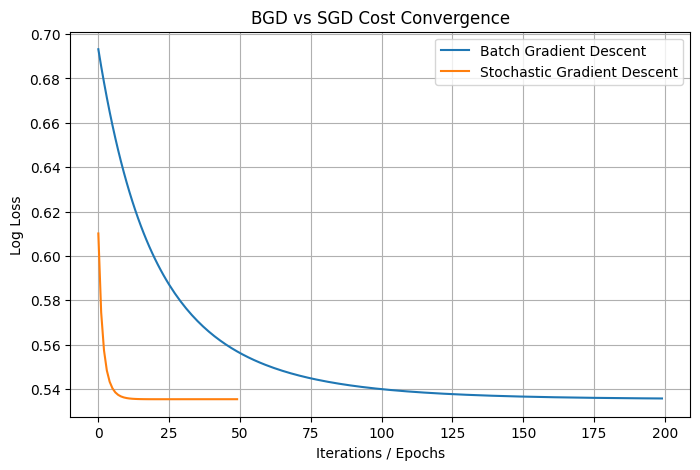

In [27]:
plt.figure(figsize=(8,5))
plt.plot(bgd_cost, label='Batch Gradient Descent')
plt.plot(sgd_cost, label='Stochastic Gradient Descent')
plt.xlabel("Iterations / Epochs")
plt.ylabel("Log Loss")
plt.title("BGD vs SGD Cost Convergence")
plt.legend()
plt.grid(True)
plt.show()


## Batch Gradient Descent vs Stochastic Gradient Descent

- Batch Gradient Descent computes gradients using the entire training
  dataset, resulting in smooth and stable convergence.

- Stochastic Gradient Descent updates model parameters using one training
  example at a time, leading to faster but noisier convergence.

- The oscillations observed in SGD are expected and occur due to the
  stochastic nature of single-sample updates.

- Despite noisy updates, SGD often converges faster in practice and is
  widely used for large-scale machine learning problems.

- Both methods optimize the same log loss cost function and converge
  toward the same global minimum under proper learning rate selection.


## 14. Logistic Regression using Scikit-Learn

In this section, we train a Logistic Regression model using the
Scikit-Learn library and evaluate its probabilistic performance
using log loss.

* Train model

* Predict probabilities

* Calculate log loss




In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = lr_model.predict_proba(X_test)

# Calculate log loss
baseline_log_loss = log_loss(y_test, y_pred_prob)

baseline_log_loss


0.4068959657047867

## 15. Feature Impact Analysis

This section evaluates how adding or removing features affects
model performance. Log loss is used as the comparison metric.


In [29]:
def train_and_evaluate(features):
    X_temp = df[features].values
    y_temp = df['churn'].values

    scaler = StandardScaler()
    X_temp = scaler.fit_transform(X_temp)

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_temp, y_temp, test_size=0.2, random_state=42
    )

    model = LogisticRegression()
    model.fit(X_tr, y_tr)

    y_prob = model.predict_proba(X_te)
    return log_loss(y_te, y_prob)


In [30]:
baseline_features = ['tenure','age','address','income','ed','employ','equip']

results = []

results.append(("Baseline", train_and_evaluate(baseline_features)))
results.append(("Remove equip", train_and_evaluate(['tenure','age','address','income','ed','employ'])))
results.append(("Remove income", train_and_evaluate(['tenure','age','address','ed','employ','equip'])))
results.append(("Remove employ", train_and_evaluate(['tenure','age','address','income','ed','equip'])))
results.append(("Remove income & employ", train_and_evaluate(['tenure','age','address','ed','equip'])))

results_df = pd.DataFrame(results, columns=["Experiment", "Log Loss"])
results_df


,Experiment,Log Loss
0,Baseline,0.406896
1,Remove equip,0.448470
2,Remove income,0.404958
3,Remove employ,0.388835
4,Remove income & employ,0.393258


## 16. Results and Discussion

* The baseline Logistic Regression model achieved a log loss of **0.4069**.
This value serves as the reference for evaluating feature importance.

* Removing the **equip** feature increased log loss, indicating that equipment
ownership provides useful information for churn prediction.

* Removing **income** resulted in minimal change, suggesting that income alone
has limited predictive power for churn in this dataset.

* The lowest log loss (**0.3888**) was achieved when the **employ** feature was
removed. This indicates that employment duration may introduce redundancy
or noise when combined with other demographic features.

* Removing both **income** and **employ** improved performance compared to the
baseline but was slightly worse than removing **employ** alone.

* Overall, the results demonstrate that feature quality is more important than
feature quantity, and removing redundant features can improve probabilistic
model performance.


## 17. Conclusion

This project explored Logistic Regression for customer churn prediction
from both a theoretical and practical perspective.

Key contributions include:
- Implementation of Logistic Regression from scratch using Gradient Descent
- Visualization of the cost function in 2D and 3D
- Comparison of Batch Gradient Descent and Stochastic Gradient Descent
- Evaluation of a Scikit-Learn Logistic Regression model
- Systematic feature impact analysis using log loss

The results highlight that careful feature selection plays a critical role
in improving model performance. Removing redundant features can enhance
probability estimation and reduce prediction uncertainty.

This study demonstrates the importance of combining mathematical understanding,
visual intuition, and empirical experimentation when building reliable
machine learning models.
